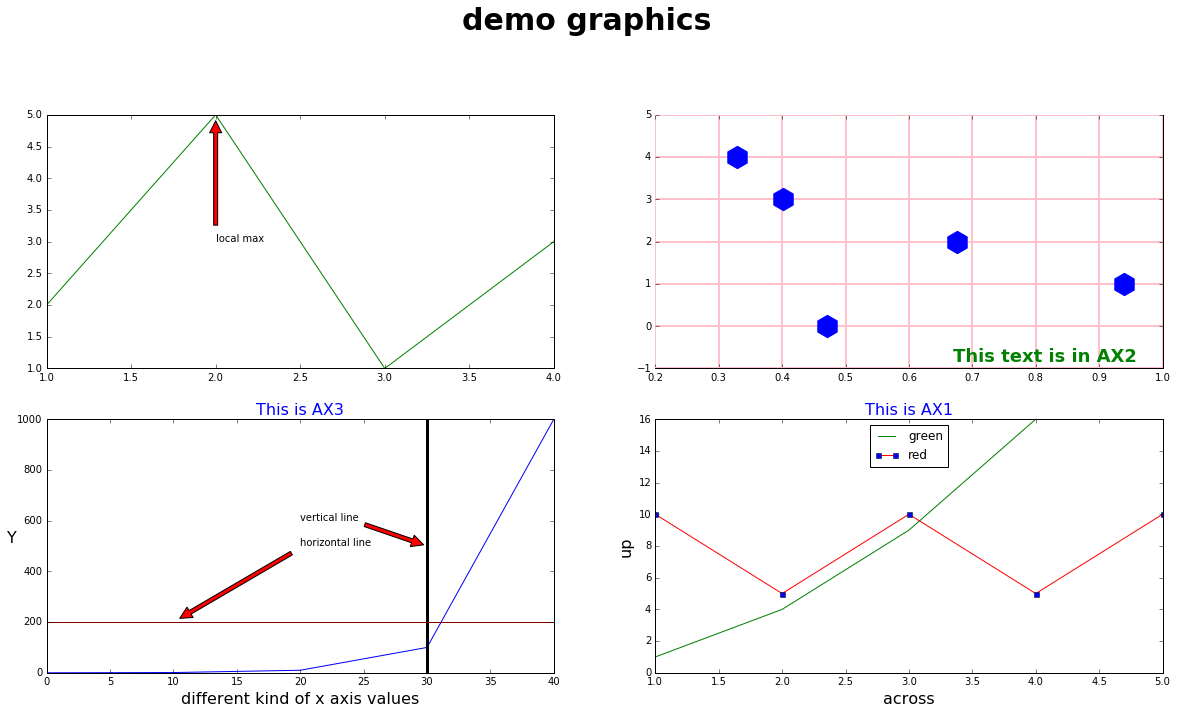

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.grid
t = np.random.rand(5)
u = np.arange(0., 5.)


fig = plt.figure(figsize=(20,10))
fig.suptitle('demo graphics', fontsize=30, fontweight='bold', y=1.05)

ax1 = fig.add_subplot(224)
ax1.set_xlabel('across', fontsize=16)
ax1.set_ylabel('up', fontsize=16)
ax1.plot([1,2,3,4], [1,4,9,16], 'g-', label='green')
ax1.plot([1,2,3,4,5], [10,5,10,5,10], 'r-', label='red', marker='s',
     markerfacecolor='blue', markersize=5)
ax1.set_title('This is AX1', fontsize=16, color='blue')

ax1.legend(loc='upper center')


ax2 = fig.add_subplot(222)
ax2.grid(color='pink', linestyle='-', linewidth=2, zorder=0)

ax2.text(0.95, 0.01, 'This text is in AX2',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='green', fontsize=18, fontweight='bold')

#ax2.plot([1,2,3,4], [1,4,9,16], 'k', linewidth=2.0, zorder=3)
ax2.scatter(t,u, marker='h', color='blue', s=500, zorder=3)


ax3 = fig.add_subplot(223)
ax3.set_title('This is AX3', fontsize=16, color='blue')
ax3.set_xlabel('different kind of x axis values', fontsize=16)
ax3.set_ylabel('Y', fontsize=16, rotation=0)

ax3.plot([0,10,20,30,40], [0,1,10,100,1000], 'b-')
ax3.plot((30,30), (1, 1000), 'k-', linewidth=3) # add black vertical line
ax3.annotate('vertical line', xy=(30,500), xytext=(20, 600),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax3.annotate('horizontal line', xy=(10,200), xytext=(20, 500),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )

ax3.axhline(y=200, xmin=0, xmax=1, color='maroon')


ax4 = fig.add_subplot(221)
ax4.plot([1,2,3,4], [2,5,1,3], 'g-')

ax4.annotate('local max', xy=(2,5), xytext=(2, 3),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )



#plt.tight_layout()
plt.show()

fig.savefig('demographics.jpg')

#For more on all the wild and wonderful things you can do with annotations, including fancy arrows, 
#see Annotating Axes and pylab_examples example code: annotation_demo.py.


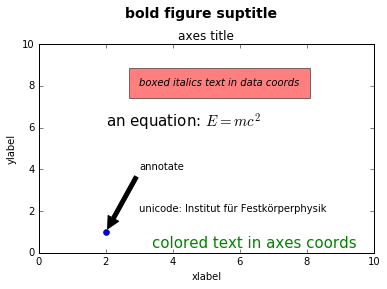

In [30]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()


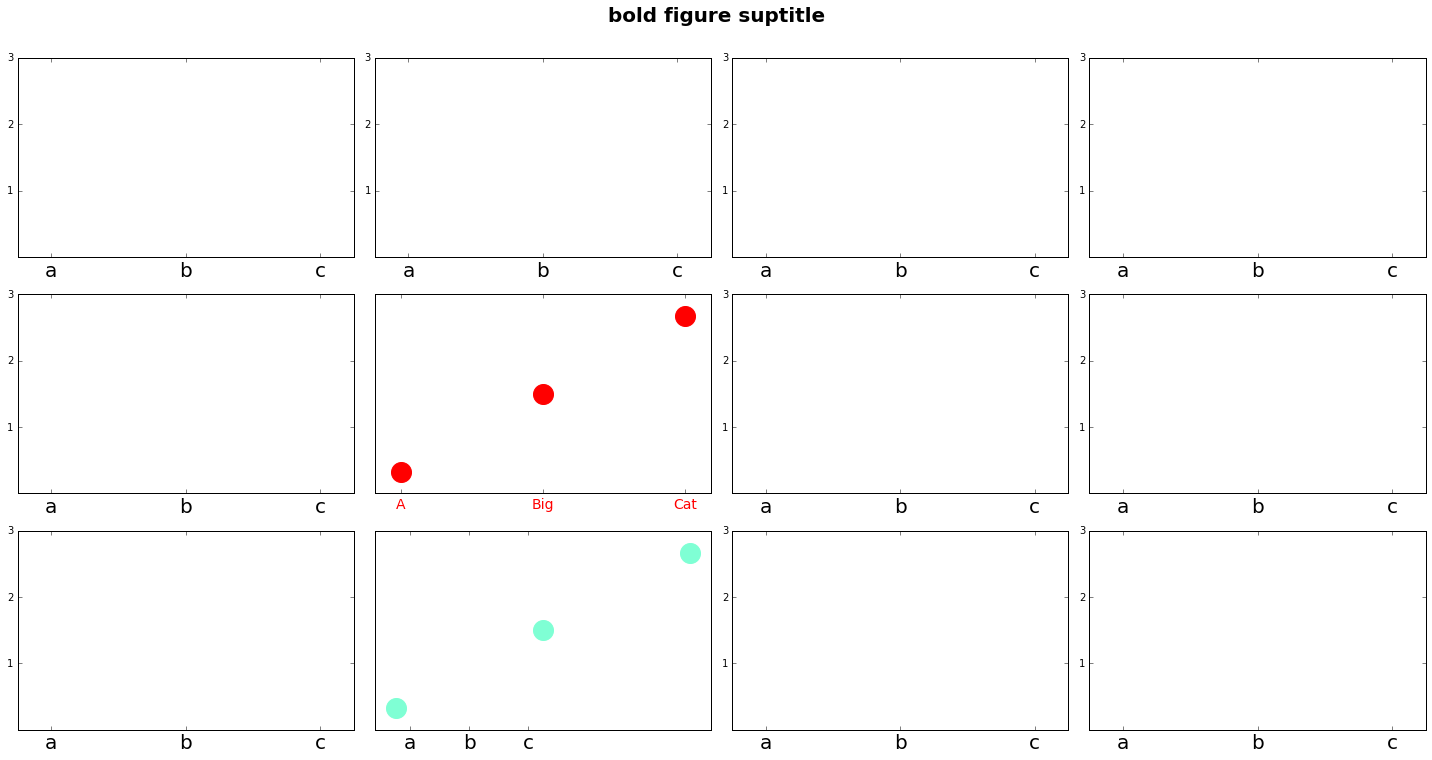

In [44]:
import matplotlib.pyplot as plt

label_size = 20
plt.rcParams['xtick.labelsize'] = label_size 

fig, axes = plt.subplots(nrows=3, ncols=4)
fig.set_figwidth(20)
fig.set_figheight(10)

# Set the ticks and ticklabels for all axes
plt.setp(axes, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'],
        yticks=[1, 2, 3])

# Use the pyplot interface to change just one subplot...
plt.sca(axes[1, 1])
plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red',fontsize=14)
plt.scatter([0,1,2],[4,5,6], color='red', s=400)

plt.sca(axes[2, 1])
plt.scatter([0,1,2],[4,5,6], color='aquamarine', s=400)

fig.suptitle('bold figure suptitle', fontsize=20, fontweight='bold', y=1.05)

fig.tight_layout()
plt.show()
fig.savefig('foo.png')
fig.savefig('foo.pdf')



### next is an example of a very elaborate box plot for you to read on your own

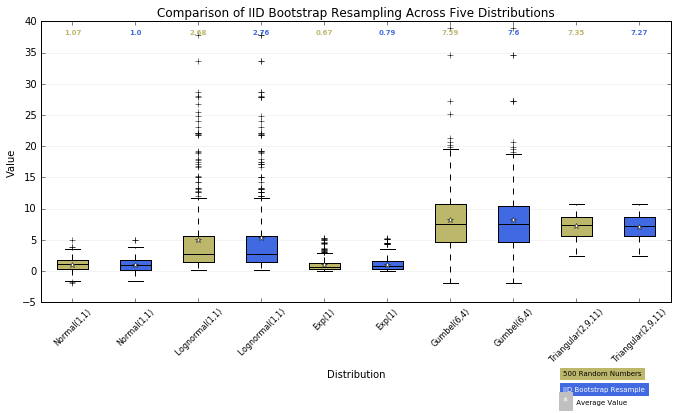

In [107]:
# http://matplotlib.org/examples/pylab_examples/boxplot_demo2.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
               'Triangular(2,9,11)']
N = 500
norm = np.random.normal(1, 1, N)
logn = np.random.lognormal(1, 1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.random_integers(0, N - 1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot, logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
        tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
            backgroundcolor=boxColors[0], color='black', weight='roman',
            size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
            backgroundcolor=boxColors[1],
            color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')

plt.show()

 
 ### an example of marker styles and multiple lines on one plot with one command


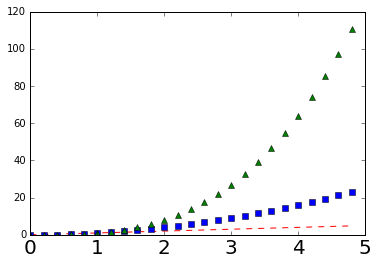

In [168]:
# http://matplotlib.org/1.4.1/api/markers_api.html
# http://matplotlib.org/api/colors_api.html

import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t,  t**2, 'bs', t, t**3, 'g^')
plt.show()



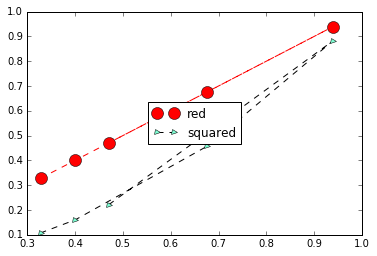

" these are the possible locations:\n'best'         : 0, (only implemented for axes legends)\n'upper right'  : 1,\n'upper left'   : 2,\n'lower left'   : 3,\n'lower right'  : 4,\n'right'        : 5,\n'center left'  : 6,\n'center right' : 7,\n'lower center' : 8,\n'upper center' : 9,\n'center'       : 10,\n"

In [20]:
#legend 

plt.plot(t, t, color='red', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12, label='red')
plt.plot(t, t**2, color='black', linestyle='dashed', marker='>',
     markerfacecolor='aquamarine', markersize=5, label='squared')
plt.legend(loc='center')
plt.show()
""" these are the possible locations:
'best'         : 0, (only implemented for axes legends)
'upper right'  : 1,
'upper left'   : 2,
'lower left'   : 3,
'lower right'  : 4,
'right'        : 5,
'center left'  : 6,
'center right' : 7,
'lower center' : 8,
'upper center' : 9,
'center'       : 10,
"""
# http://matplotlib.org/api/legend_api.html


### and now a demo of controlling marker size and color as vectors

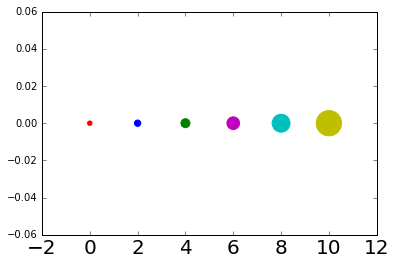

In [63]:

colors = ['r', 'b', 'g', 'm', 'c', 'y', 'k']
x = [0,2,4,6,8,10]
y = [0]*len(x) # all 0's

s = [20*2**n for n in range(len(x))]
plt.scatter(x, y, s=s, color=colors)
plt.show()

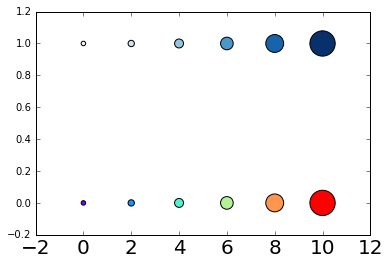

In [59]:
z = [1,2,3,4,5,6]
plt.scatter(x, y, s=s, c=z, marker='o', cmap=plt.cm.rainbow)
plt.scatter(x, [x+1 for  x in y], s=s, c=z, marker='o', cmap=plt.cm.Blues)
plt.show()

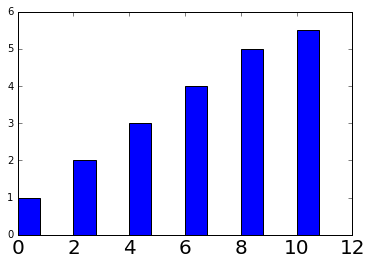

In [87]:
plt.bar(x,[1,2,3,4,5,5.5])
plt.show()

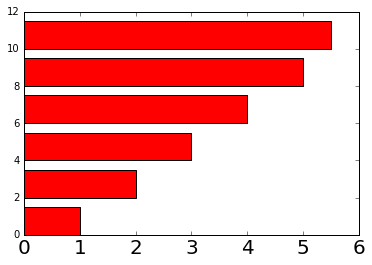

In [88]:
plt.barh(x,[1,2,3,4,5,5.5], 1.5, color='red')
plt.show()

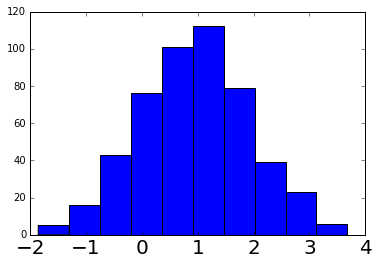

In [89]:
norm = np.random.normal(1, 1, 500)

plt.hist(norm)
plt.show()


(array([  3.,   2.,   3.,  13.,  21.,  22.,  32.,  44.,  51.,  50.,  52.,
         60.,  40.,  39.,  25.,  14.,  13.,  10.,   2.,   4.]),
 array([-1.85852361, -1.58153665, -1.3045497 , -1.02756275, -0.7505758 ,
        -0.47358885, -0.1966019 ,  0.08038506,  0.35737201,  0.63435896,
         0.91134591,  1.18833286,  1.46531982,  1.74230677,  2.01929372,
         2.29628067,  2.57326762,  2.85025458,  3.12724153,  3.40422848,
         3.68121543]),
 <a list of 20 Patch objects>)

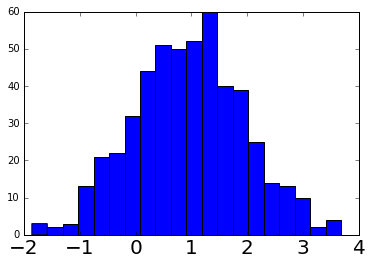

In [90]:

plt.hist(norm,bins=20)
#plt.show()
